# Regression models

dt

4/25/22


the last notebook, number 5, doesn't have much in it. I was preparing to merge the CAES data with the business counts by zip, but that's already been done! It's in `raw_data/all_merged.csv`

- [first regression with selected features.](#first-regression-with-selected-features.)
- [time and space](#time-and-space)
- [warehouse counts](#warehouse-counts)
- [social](#social)
- [CAES scores regression](#CAES-scores-regression)
- [PCA](#PCA)

In [202]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
all_merged_filepath = '../processed_data/all_merged.csv'

In [137]:
#makde the all_merged dataframe.
amgd = pd.read_csv(all_merged_filepath)

In [138]:
amgd

,zip,total population,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,pesticides,pesticides pctl,...,cardiovascular disease,cardiovascular disease pctl,housing burden,housing burden pctl,census_year,est total,est gen,est cold,est farm,est other
0,93706,41087,0.177311,76.550000,15.610000,95.960000,6.140000,56.190000,1120.30,90.59,...,NaN,NaN,NaN,NaN,2012,4,4,0,0,0
1,93307,82658,0.512336,93.700000,19.400000,99.690000,9.570000,64.730000,7128.70,98.37,...,NaN,NaN,NaN,NaN,2012,1,0,0,1,0
2,95205,38069,0.022790,38.530000,12.510000,71.650000,18.950000,80.500000,94.20,72.24,...,NaN,NaN,NaN,NaN,2012,1,0,0,0,1
3,93702,48607,0.317831,86.990000,16.080000,97.060000,36.850000,94.910000,7.92,53.79,...,NaN,NaN,NaN,NaN,2012,0,0,0,0,0
4,90058,3223,0.015613,31.320000,15.260000,94.980000,56.800000,98.360000,0.00,0.00,...,NaN,NaN,NaN,NaN,2012,35,12,19,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25439,92140,3760,0.042599,29.894213,10.270812,50.914748,0.000952,80.883634,0.00,0.00,...,7.98,13.659023,NaN,NaN,2014,0,0,0,0,0
25440,92135,2467,0.042599,29.894213,10.463289,52.283759,0.000576,63.932794,0.00,0.00,...,3.73,0.024925,NaN,NaN,2014,0,0,0,0,0
25441,94128,0,0.034190,10.566273,8.789373,32.619788,0.002846,98.382078,0.00,0.00,...,NaN,NaN,NaN,NaN,2014,0,0,0,0,0
25442,57,10,0.039421,17.672682,7.052988,6.994400,0.000007,1.008090,0.00,0.00,...,8.59,17.896311,NaN,NaN,2014,0,0,0,0,0


In [139]:
#ah ma gahd!

In [140]:
amgd.describe()

,zip,total population,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,pesticides,pesticides pctl,...,cardiovascular disease,cardiovascular disease pctl,housing burden,housing burden pctl,census_year,est total,est gen,est cold,est farm,est other
count,25444.000000,25444.000000,25333.000000,25333.000000,25286.000000,25286.000000,25444.000000,25444.000000,25444.000000,25444.000000,...,16059.000000,16059.000000,15768.000000,15768.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000
mean,92864.446156,5917.335796,0.068468,47.320326,10.221574,51.367337,12.497526,50.444645,296.028216,18.939449,...,10.837837,50.011075,18.908923,50.184404,2013.578958,1.959047,1.468716,0.181222,0.028730,0.280380
std,3380.897400,7251.318591,0.112443,30.957227,2.503114,29.032522,16.249286,28.787606,2555.276827,30.078159,...,4.953450,28.891888,8.509076,28.835873,0.590788,5.277823,4.470229,0.757449,0.182993,0.718911
min,32.000000,0.000000,0.000000,0.000000,1.651081,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.800000,0.012674,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91606.000000,3423.750000,0.030640,20.650000,8.559432,27.690338,0.000898,25.672060,0.000000,0.000000,...,7.265000,25.000000,12.600000,25.323194,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,92703.000000,4556.000000,0.045884,48.450529,10.370000,52.610000,7.650000,50.667918,0.000000,0.000000,...,9.760000,50.024925,17.600000,50.266160,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,94564.000000,5946.000000,0.059387,73.930000,12.050000,77.977844,19.760000,75.400000,0.488285,34.110000,...,13.320000,75.070000,23.900000,75.107731,2014.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,96161.000000,105549.000000,1.285954,100.000000,21.200000,100.000000,253.731000,100.000000,91316.190000,100.000000,...,40.850000,100.000000,78.200000,100.000000,2014.000000,96.000000,86.000000,19.000000,3.000000,9.000000


In [141]:
list(amgd.columns)

['zip',
 'total population',
 'ozone',
 'ozone pctl',
 'pm2.5',
 'pm2.5 pctl',
 'diesel pm',
 'diesel pm pctl',
 'pesticides',
 'pesticides pctl',
 'traffic',
 'traffic pctl',
 'cleanup sites',
 'cleanup sites pctl',
 'groundwater threats',
 'groundwater threats pctl',
 'haz. waste',
 'haz. waste pctl',
 'imp. water bodies',
 'imp. water bodies pctl',
 'solid waste',
 'solid waste pctl',
 'pollution burden',
 'pollution burden score',
 'asthma',
 'asthma pctl',
 'low birth weight',
 'low birth weight pctl',
 'education',
 'education pctl',
 'linguistic isolation',
 'linguistic isolation pctl',
 'poverty',
 'poverty pctl',
 'pop. char. ',
 'pop. char. score',
 'ces_score',
 'ces_per_range',
 'year',
 'census tract',
 'county',
 'drinking water',
 'drinking water pctl',
 'tox. release',
 'tox. release pctl',
 'pollution burden pctl',
 'unemployment',
 'unemployment pctl',
 'pop. char. pctl',
 'city',
 'latitude',
 'longitude',
 'ces_per',
 'cardiovascular disease',
 'cardiovascular disea

In [142]:
#cutting out percentiles , lat/lon, zip, census tract, "scores"
initial_columns_to_fit =[
 'total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']

In [143]:
amgd[initial_columns_to_fit].dtypes

total population            int64
ozone                     float64
pm2.5                     float64
diesel pm                 float64
pesticides                float64
traffic                   float64
cleanup sites             float64
groundwater threats       float64
haz. waste                float64
imp. water bodies           int64
solid waste               float64
pollution burden          float64
asthma                    float64
low birth weight          float64
education                 float64
linguistic isolation      float64
poverty                   float64
pop. char.                float64
drinking water            float64
tox. release              float64
unemployment              float64
ces_per                   float64
cardiovascular disease    float64
housing burden            float64
est total                   int64
est gen                     int64
est cold                    int64
est farm                    int64
est other                   int64
dtype: object

In [144]:
amgd[initial_columns_to_fit].isna().sum()

total population             0
ozone                      111
pm2.5                      158
diesel pm                    0
pesticides                   0
traffic                     91
cleanup sites                0
groundwater threats          0
haz. waste                   0
imp. water bodies            0
solid waste                  0
pollution burden             0
asthma                      21
low birth weight           626
education                  325
linguistic isolation      1043
poverty                    285
pop. char.                 274
drinking water            1420
tox. release              1351
unemployment              2010
ces_per                   9583
cardiovascular disease    9385
housing burden            9676
est total                    0
est gen                      0
est cold                     0
est farm                     0
est other                    0
dtype: int64

In [145]:
# make a dataframe with just the initial_columns_to_fit, and all NaNs filled with median.
amgd_cut = amgd[initial_columns_to_fit].fillna(amgd[initial_columns_to_fit].median())

In [146]:
amgd[initial_columns_to_fit].median()

total population          4556.000000
ozone                        0.045884
pm2.5                       10.370000
diesel pm                    7.650000
pesticides                   0.000000
traffic                    814.370656
cleanup sites                2.250000
groundwater threats          7.600000
haz. waste                   0.130000
imp. water bodies            1.000000
solid waste                  0.200000
pollution burden            41.813213
asthma                      42.680000
low birth weight             5.067230
education                   13.900000
linguistic isolation         7.300000
poverty                     30.922021
pop. char.                  49.622609
drinking water             411.376372
tox. release               417.521667
unemployment                 8.310000
ces_per                     50.010000
cardiovascular disease       9.760000
housing burden              17.600000
est total                    0.000000
est gen                      0.000000
est cold    

In [147]:
amgd_cut.isna().sum()

total population          0
ozone                     0
pm2.5                     0
diesel pm                 0
pesticides                0
traffic                   0
cleanup sites             0
groundwater threats       0
haz. waste                0
imp. water bodies         0
solid waste               0
pollution burden          0
asthma                    0
low birth weight          0
education                 0
linguistic isolation      0
poverty                   0
pop. char.                0
drinking water            0
tox. release              0
unemployment              0
ces_per                   0
cardiovascular disease    0
housing burden            0
est total                 0
est gen                   0
est cold                  0
est farm                  0
est other                 0
dtype: int64

<AxesSubplot:>

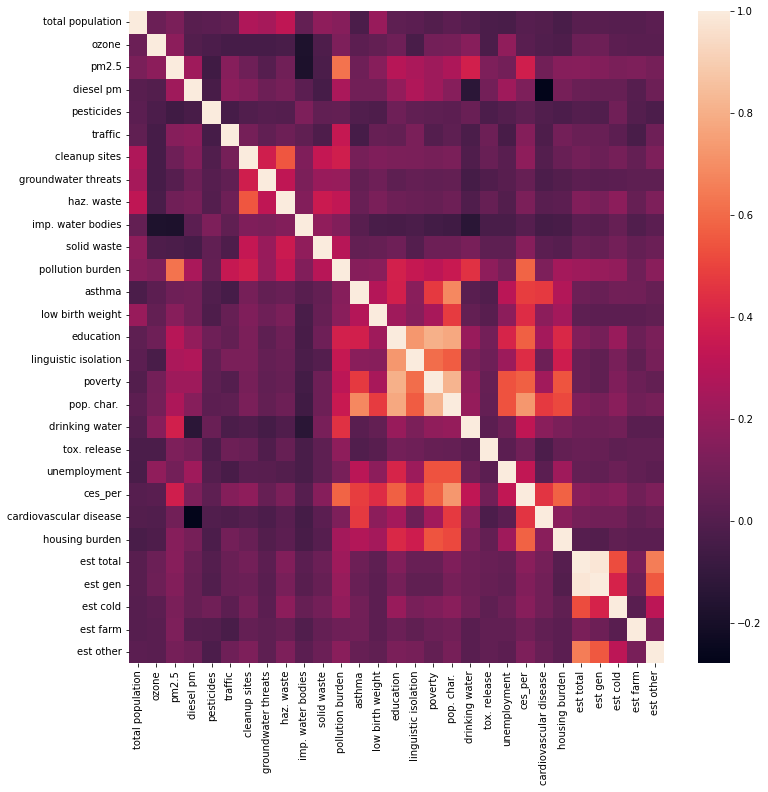

In [148]:
correlations = amgd_cut.corr()
plt.figure(figsize = (12,12))
sns.heatmap(correlations)

Wow. Why is diesel pm INVERSELY related to cardiovascular disease? Maybe because diesel drops with time, and or cardiovascular disease rises.

remember: correlations here are kind of like 1-D linear regressions. The correlation from a single feature does not remove the influence of other features.

# first regression with selected features.
## simple linear regressions with these and health.

In [149]:
health_cols = ['asthma', 'low birth weight', 'cardiovascular disease']

In [150]:

X = amgd_cut.drop(columns = health_cols)
y = amgd_cut[health_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 1)


In [151]:
%%time
#fit to each.
lr_asthma = LinearRegression()
lr_asthma.fit(X_train, y_train['asthma'])

lr_lbw = LinearRegression()
lr_lbw.fit(X_train, y_train['low birth weight'])

lr_cvd = LinearRegression()
lr_cvd.fit(X_train, y_train['cardiovascular disease']);

Wall time: 76.8 ms


LinearRegression()

In [152]:
lr_asthma.score(X_train, y_train['asthma'])

0.5929298481514989

In [153]:
lr_lbw.score(X_train, y_train['low birth weight'])

0.38478191660361283

In [154]:
lr_cvd.score(X_train, y_train['cardiovascular disease'])

0.4965985829427164

In [155]:
lr_asthma.score(X_test, y_test['asthma'])

0.59249008004936

In [156]:
lr_lbw.score(X_test, y_test['low birth weight'])

0.4050070293729887

In [157]:
lr_cvd.score(X_test, y_test['cardiovascular disease'])

0.5063605498988087

The last few coefficients show the change with numbers of warehouse businesses.

In [158]:
# list columns to check against coefficients.
amgd.columns[-5:]

Index(['est total', 'est gen', 'est cold', 'est farm', 'est other'], dtype='object')

In [159]:
#asthma incidence rate, cases/ 10k population
lr_asthma.coef_[-5:]

array([ 0.84450458, -0.90529518, -0.70546959,  3.7159282 , -1.26065885])

In [160]:
#low birth weight, %age
lr_lbw.coef_[-5:]

array([-0.04293162,  0.03693004,  0.00450155, -0.09182991,  0.0074667 ])

In [161]:
#cardiovascular disease, incidence rate, cases/ 100 population
lr_cvd.coef_[-5:]

array([-0.02720375,  0.04240864,  0.10847614, -0.21246871,  0.03438017])

# time and space
## simple linreg with just time and space

Because latitude and longitude are negatively correlated ( \ shape of california), lat/lon are not independent. the coefficients may not be clear. There is mixing of S/E and N/W.


In [162]:
amgd_ts_cut = amgd.dropna()[timespace_cols + health_cols]

In [163]:
timespace_cols = ['year', 'latitude', 'longitude']
X = amgd_ts_cut[timespace_cols]
y = amgd_ts_cut[health_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [164]:
#asthma
lrts_a = LinearRegression()
lrts_a.fit(X_train, y_train['asthma'])

#low birth weight
lrts_b = LinearRegression()
lrts_b.fit(X_train, y_train['low birth weight'])

#cardiovascular disease
lrts_c = LinearRegression()
lrts_c.fit(X_train, y_train['cardiovascular disease']);

In [165]:
# score asthma fits with space and time
# lousy scores.
lrts_a.score(X_train, y_train['asthma']), lrts_a.score(X_test, y_test['asthma'])

(0.041981820590096475, 0.06041174892784107)

In [166]:
# asthma decreases with time, increases with latitude (north), increases with longitude (east)
lrts_a.coef_

array([-0.04077386,  7.47974512,  5.81483506])

In [167]:
# score low birth weight fits with space and time
#terrible fits. As good as random. extremely uncorrelated with space and time
lrts_b.score(X_train, y_train['low birth weight']), lrts_b.score(X_test, y_test['low birth weight'])

(0.006677862215139441, 0.00977908084432988)

In [168]:
# low birth weight coefs
lrts_b.coef_

array([0.00864075, 0.02722813, 0.09034145])

In [169]:
#score cardiovascular fits with space and time
# not great but better than nothing
lrts_c.score(X_train, y_train['cardiovascular disease']), lrts_c.score(X_test, y_test['cardiovascular disease'])

(0.382536439907755, 0.3765247295343904)

In [170]:
# cvd increase with time, increases as you go north, and increases as you go east
lrts_c.coef_

array([1.71997246, 2.06474579, 2.28605004])

# warehouse counts
## simple linreg with just warehouse counts

In [171]:
#excluding total. It is not independent of the others for sure!
warehouse_cols =list(amgd.columns[-4:])
warehouse_cols

['est gen', 'est cold', 'est farm', 'est other']

In [172]:
amgd_wh_cut = amgd.dropna()[warehouse_cols + health_cols]

In [173]:
X = amgd_wh_cut[warehouse_cols]
y = amgd_wh_cut[health_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [174]:
#asthma
lrwh_a = LinearRegression()
lrwh_a.fit(X_train, y_train['asthma'])

#low birth weight
lrwh_b = LinearRegression()
lrwh_b.fit(X_train, y_train['low birth weight'])

#cardiovascular disease
lrwh_c = LinearRegression()
lrwh_c.fit(X_train, y_train['cardiovascular disease']);

In [175]:
#score asthma fits with warehouse counts
#bad
lrwh_a.score(X_train, y_train['asthma']), lrwh_a.score(X_test, y_test['asthma'])

(0.02162017696184837, 0.021397245331703174)

In [176]:
#score low birth weight fits with warehouse counts
#bad
lrwh_b.score(X_train, y_train['low birth weight']), lrwh_b.score(X_test, y_test['low birth weight'])

(0.004197637879798988, 0.004047635760388579)

In [177]:
#score cvd fits with warehouse counts
#bad
lrwh_c.score(X_train, y_train['cardiovascular disease']), lrwh_c.score(X_test, y_test['cardiovascular disease'])

(0.021670901574785795, 0.02177387807216047)

# social
# fits with only "social" features

In [178]:
amgd.columns.to_list()

['zip',
 'total population',
 'ozone',
 'ozone pctl',
 'pm2.5',
 'pm2.5 pctl',
 'diesel pm',
 'diesel pm pctl',
 'pesticides',
 'pesticides pctl',
 'traffic',
 'traffic pctl',
 'cleanup sites',
 'cleanup sites pctl',
 'groundwater threats',
 'groundwater threats pctl',
 'haz. waste',
 'haz. waste pctl',
 'imp. water bodies',
 'imp. water bodies pctl',
 'solid waste',
 'solid waste pctl',
 'pollution burden',
 'pollution burden score',
 'asthma',
 'asthma pctl',
 'low birth weight',
 'low birth weight pctl',
 'education',
 'education pctl',
 'linguistic isolation',
 'linguistic isolation pctl',
 'poverty',
 'poverty pctl',
 'pop. char. ',
 'pop. char. score',
 'ces_score',
 'ces_per_range',
 'year',
 'census tract',
 'county',
 'drinking water',
 'drinking water pctl',
 'tox. release',
 'tox. release pctl',
 'pollution burden pctl',
 'unemployment',
 'unemployment pctl',
 'pop. char. pctl',
 'city',
 'latitude',
 'longitude',
 'ces_per',
 'cardiovascular disease',
 'cardiovascular disea

In [107]:
social_cols = [
    'total population',
    'traffic',
    'education',
    'linguistic isolation',
    'poverty',
    'unemployment',
    'housing burden'
]

<AxesSubplot:>

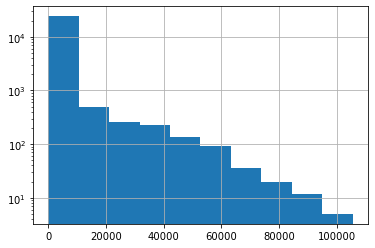

In [108]:
amgd['total population'].hist(log = True)

In [109]:
X = amgd_cut[social_cols]
y = amgd_cut[health_cols]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=1)

In [110]:
#asthma
lr_social_a = LinearRegression()
lr_social_a.fit(xtrain, ytrain['asthma'])

#low birth weight
lr_social_b = LinearRegression()
lr_social_b.fit(xtrain, ytrain['low birth weight'])

#cardiovascular discceseaesf
lr_social_c = LinearRegression()
lr_social_c.fit(xtrain, ytrain['cardiovascular disease']);

In [111]:
#score asthma 
lr_social_a.score(xtrain, ytrain['asthma']), lr_social_a.score(xtest, ytest['asthma'])

(0.2627549766769105, 0.26482031792771943)

In [112]:
#asthma coefficients
lr_social_a.coef_

array([-9.83073996e-05, -7.43491909e-04,  3.98869536e-01, -7.78380741e-01,
        5.90009143e-01,  2.65111028e-01,  2.80210064e-01])

In [113]:
#score lbw
lr_social_b.score(xtrain, ytrain['low birth weight']), lr_social_b.score(xtest, ytest['low birth weight'])

(0.13333229083938192, 0.13754920307177987)

In [114]:
#lbw coefficients
lr_social_b.coef_

array([ 3.92206652e-05,  4.74715087e-05,  7.26734578e-03, -6.05956882e-03,
        5.79351871e-03,  1.85541176e-02,  3.28708782e-02])

In [115]:
#score cvd
lr_social_c.score(xtrain, ytrain['cardiovascular disease']), lr_social_c.score(xtest, ytest['cardiovascular disease'])

(0.10994997406433493, 0.11001842551082852)

In [116]:
#cvd coefficients
lr_social_c.coef_

array([-5.60549741e-06, -4.34947502e-05,  8.31831268e-02, -1.02944221e-01,
        3.74712300e-02, -1.27049879e-01,  3.41043573e-02])

# CAES scores regression
# regression with just CAES and other derived scores.

if these are good, it may mean the scores are well designed.

In [122]:
amgd.columns.to_list()

['zip',
 'total population',
 'ozone',
 'ozone pctl',
 'pm2.5',
 'pm2.5 pctl',
 'diesel pm',
 'diesel pm pctl',
 'pesticides',
 'pesticides pctl',
 'traffic',
 'traffic pctl',
 'cleanup sites',
 'cleanup sites pctl',
 'groundwater threats',
 'groundwater threats pctl',
 'haz. waste',
 'haz. waste pctl',
 'imp. water bodies',
 'imp. water bodies pctl',
 'solid waste',
 'solid waste pctl',
 'pollution burden',
 'pollution burden score',
 'asthma',
 'asthma pctl',
 'low birth weight',
 'low birth weight pctl',
 'education',
 'education pctl',
 'linguistic isolation',
 'linguistic isolation pctl',
 'poverty',
 'poverty pctl',
 'pop. char. ',
 'pop. char. score',
 'ces_score',
 'ces_per_range',
 'year',
 'census tract',
 'county',
 'drinking water',
 'drinking water pctl',
 'tox. release',
 'tox. release pctl',
 'pollution burden pctl',
 'unemployment',
 'unemployment pctl',
 'pop. char. pctl',
 'city',
 'latitude',
 'longitude',
 'ces_per',
 'cardiovascular disease',
 'cardiovascular disea

In [180]:
score_cols = [
    'pollution burden',
    'pop. char. ',
    'ces_score',
    'housing burden'
]

amgd_cut_scores = amgd[score_cols + health_cols].copy()
amgd_cut_scores.fillna(amgd_cut_scores.median(), inplace = True)

In [181]:
x = amgd_cut_scores[score_cols].dropna()
y = amgd_cut_scores[health_cols]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state = 1)

In [190]:
# asthma
lr_scores_a = LinearRegression()
lr_scores_a.fit(xtrain, ytrain['asthma'])

# low birth weight
lr_scores_b = LinearRegression()
lr_scores_b.fit(xtrain, ytrain['low birth weight'])

# cardiovascular
lr_scores_c = LinearRegression()
lr_scores_c.fit(xtrain, ytrain['cardiovascular disease']);


In [193]:
#asthma
lr_scores_a.score(xtrain, ytrain['asthma']), lr_scores_a.score(xtest,ytest['asthma'])

(0.4832395083165938, 0.4807148307370688)

In [196]:
lr_scores_a.coef_

array([-0.31310851,  1.04225765,  0.14907589, -0.37563543])

In [194]:
#low birth weight
lr_scores_b.score(xtrain, ytrain['low birth weight']), lr_scores_b.score(xtest, ytest['low birth weight'])

(0.23950857499514167, 0.2515350979968135)

In [197]:
lr_scores_b.coef_

array([ 0.02183679,  0.05232562, -0.03783626,  0.00241605])

In [198]:
# cardiovascular disease
lr_scores_c.score(xtrain, ytrain['cardiovascular disease']), lr_scores_c.score(xtest, ytest['cardiovascular disease'])

(0.2364798467342505, 0.23122365100217368)

In [199]:
lr_scores_c.coef_

array([-0.03835311,  0.08608129,  0.04443733, -0.0663506 ])

# PCA

In [203]:
pca = PCA()

In [208]:

xtrain, xtest, ytrain, ytest = train_test_split(amgd_cut.drop(columns = health_cols),
                                               amgd_cut[health_cols],
                                               test_size = 0.1,
                                               random_state = 1)

pca.fit(xtrain)


PCA()

In [205]:
pca.components_

array([[-3.70788017e-02, -2.94459188e-07,  2.98209791e-05,
         1.46867841e-04, -5.27704084e-03,  7.57933759e-03,
         1.10614313e-04, -1.20029012e-04,  8.47037736e-06,
        -1.53916324e-05,  1.13194773e-05,  2.11246399e-04,
        -1.63135501e-05,  1.12736144e-06,  1.43159252e-04,
         7.55247894e-05,  1.02947982e-04,  9.97619288e-05,
         4.60170700e-04,  9.99269470e-01,  1.18924403e-05,
         1.98540064e-04, -7.53317741e-06,  3.11661489e-05,
         2.98794030e-05,  2.41507745e-05,  2.20916894e-06,
         7.21754030e-07,  2.79770559e-06],
       [ 9.99249331e-01,  1.09656940e-06,  4.24337470e-05,
         4.16050053e-05,  9.03696151e-03,  6.05252117e-03,
         7.92034166e-04,  2.60392031e-03,  8.16235554e-05,
         2.87863822e-05,  1.09725682e-04,  2.88527708e-04,
        -1.07331480e-04,  3.86777247e-05,  8.29025360e-05,
         3.93885593e-05, -3.60292968e-06,  7.78005504e-05,
         7.86562840e-05,  3.70799563e-02, -2.34077433e-05,
         4.65

#  xgboost

In [211]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

gsc = GridSearchCV(
            estimator=xbg.XGBRegressor(nthread=4),
            param_grid={"learning_rate":[0.10,0.15,0.20],
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
                       'nthread':[4]},
            cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=1)

ModuleNotFoundError: No module named 'xgboost'